In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!kaggle competitions download -c GiveMeSomeCredit


  0%|          | 0.00/5.16M [00:00<?, ?B/s]
 19%|█▉        | 1.00M/5.16M [00:00<00:01, 3.79MB/s]
 39%|███▉      | 2.00M/5.16M [00:00<00:00, 4.77MB/s]
 58%|█████▊    | 3.00M/5.16M [00:00<00:00, 4.50MB/s]
 78%|███████▊  | 4.00M/5.16M [00:00<00:00, 5.18MB/s]
 97%|█████████▋| 5.00M/5.16M [00:01<00:00, 5.59MB/s]
100%|██████████| 5.16M/5.16M [00:01<00:00, 5.18MB/s]


In [11]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the training data
training_data_path = 'C:/Users/tenzi/OneDrive/Desktop/Data Analyst Portfolio Data/GiveMeSomeCredit/cs-training.csv'
training_data = pd.read_csv(training_data_path)



In [5]:
# Display the first few rows of the dataset
training_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

### Training Data Overview
The dataset cs-training.csv contains 150,000 entries and 12 columns:

- Unnamed: 0: An index column.
- SeriousDlqin2yrs: Indicates if the person experienced 90 days past due delinquency or worse (1 if true, 0 if false).
- RevolvingUtilizationOfUnsecuredLines: The total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
- age: The age of the borrower in years.
- NumberOfTime30-59DaysPastDueNotWorse: Number of times the borrower has been 30-59 days past due but no worse in the last 2 years.
- DebtRatio: Monthly debt payments, alimony, living costs divided by monthy gross income.
- MonthlyIncome: Monthly income of the borrower.
- NumberOfOpenCreditLinesAndLoans: Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards).
- NumberOfTimes90DaysLate: Number of times the borrower has been 90 days or more past due.
- NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit.
- NumberOfTime60-89DaysPastDueNotWorse: Number of times the borrower has been 60-89 days past due but no worse in the last 2 years.
- NumberOfDependents: Number of dependents in family excluding themselves (spouse, children, etc.).

There are some missing values in the MonthlyIncome and NumberOfDependents columns.

In [9]:
# Load the data dictionary
data_dictionary_path = 'C:/Users/tenzi/OneDrive/Desktop/Data Analyst Portfolio Data/GiveMeSomeCredit/Data Dictionary.xls'
data_dictionary = pd.read_excel(data_dictionary_path)

# Display the contents of the data dictionary
data_dictionary.head(15)


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [13]:
# Check for missing values
missing_values = training_data.isnull().sum()

# Basic statistics of the dataset
basic_stats = training_data.describe()

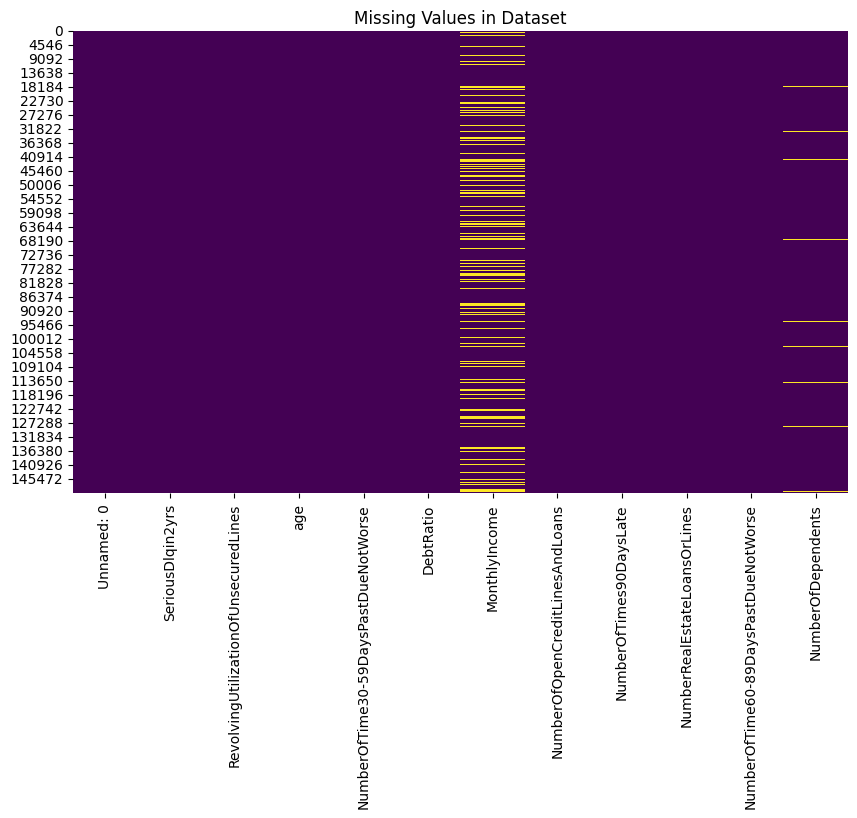

In [14]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(training_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

In [19]:
pd.DataFrame({"Column": missing_values.index, 
              "Number of Null Values": missing_values.values,
              "Proportion": missing_values.values / len(training_data) })

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


In [17]:
# Basic Statistic of the dataset
basic_stats

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000
